In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set_palette('pastel')

/kaggle/input/heart-disease-uci/heart.csv


### Problem Statement: 
To identify whether a patient is at risk of heart disease based on age, sex, and medical parameters



### Summary of background research:
Heart attacks are induced by blood clots, which prevent blood flow. These blood clots are formed when plaque build up within blood vessels become dislodged. Plaque is essentially a build up of cholestrol and fat on blood vessel walls.

Factors that promote plaque build up is high cholestrol, unhealthy diets, and lack of exercise. These factors can be quantified by attributes such as blood pressure, cholestrol levels, heart rate and so forth - which give an indication on the health of the patients heart and circulatory system.

### Step One: Loading the data

In [2]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')

### Step Two: Check dataset (Missing values / Outliers etc.)

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data[data.chol>380]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [6]:
data.drop(data[data.chol>380].index, axis=0, inplace=True)

Observations with a cholestrol level of over 380 will be removed. These values do not correspond to serum cholestrol levels, and are most likely Triglyceride values.

Other values seem about right.

No missing values.

### Step Three: Exploring the data

In [7]:
#checking the balance of targets:

data.target.value_counts()

1    162
0    136
Name: target, dtype: int64

### Comment on Dataset:
The data is well balanced, thus classification inaccuracy due to unbalanced data is not a risk

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.228188,0.694631,0.969799,131.553691,243.043624,0.147651,0.536913,149.546980,0.328859,1.025168,1.402685,0.721477,2.308725,0.543624
std,9.081836,0.461338,1.032678,17.612519,45.094679,0.355350,0.525748,23.079853,0.470589,1.156392,0.618671,1.018156,0.612983,0.498931
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000
75%,60.750000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f257aecc750>,
      dtype=object)

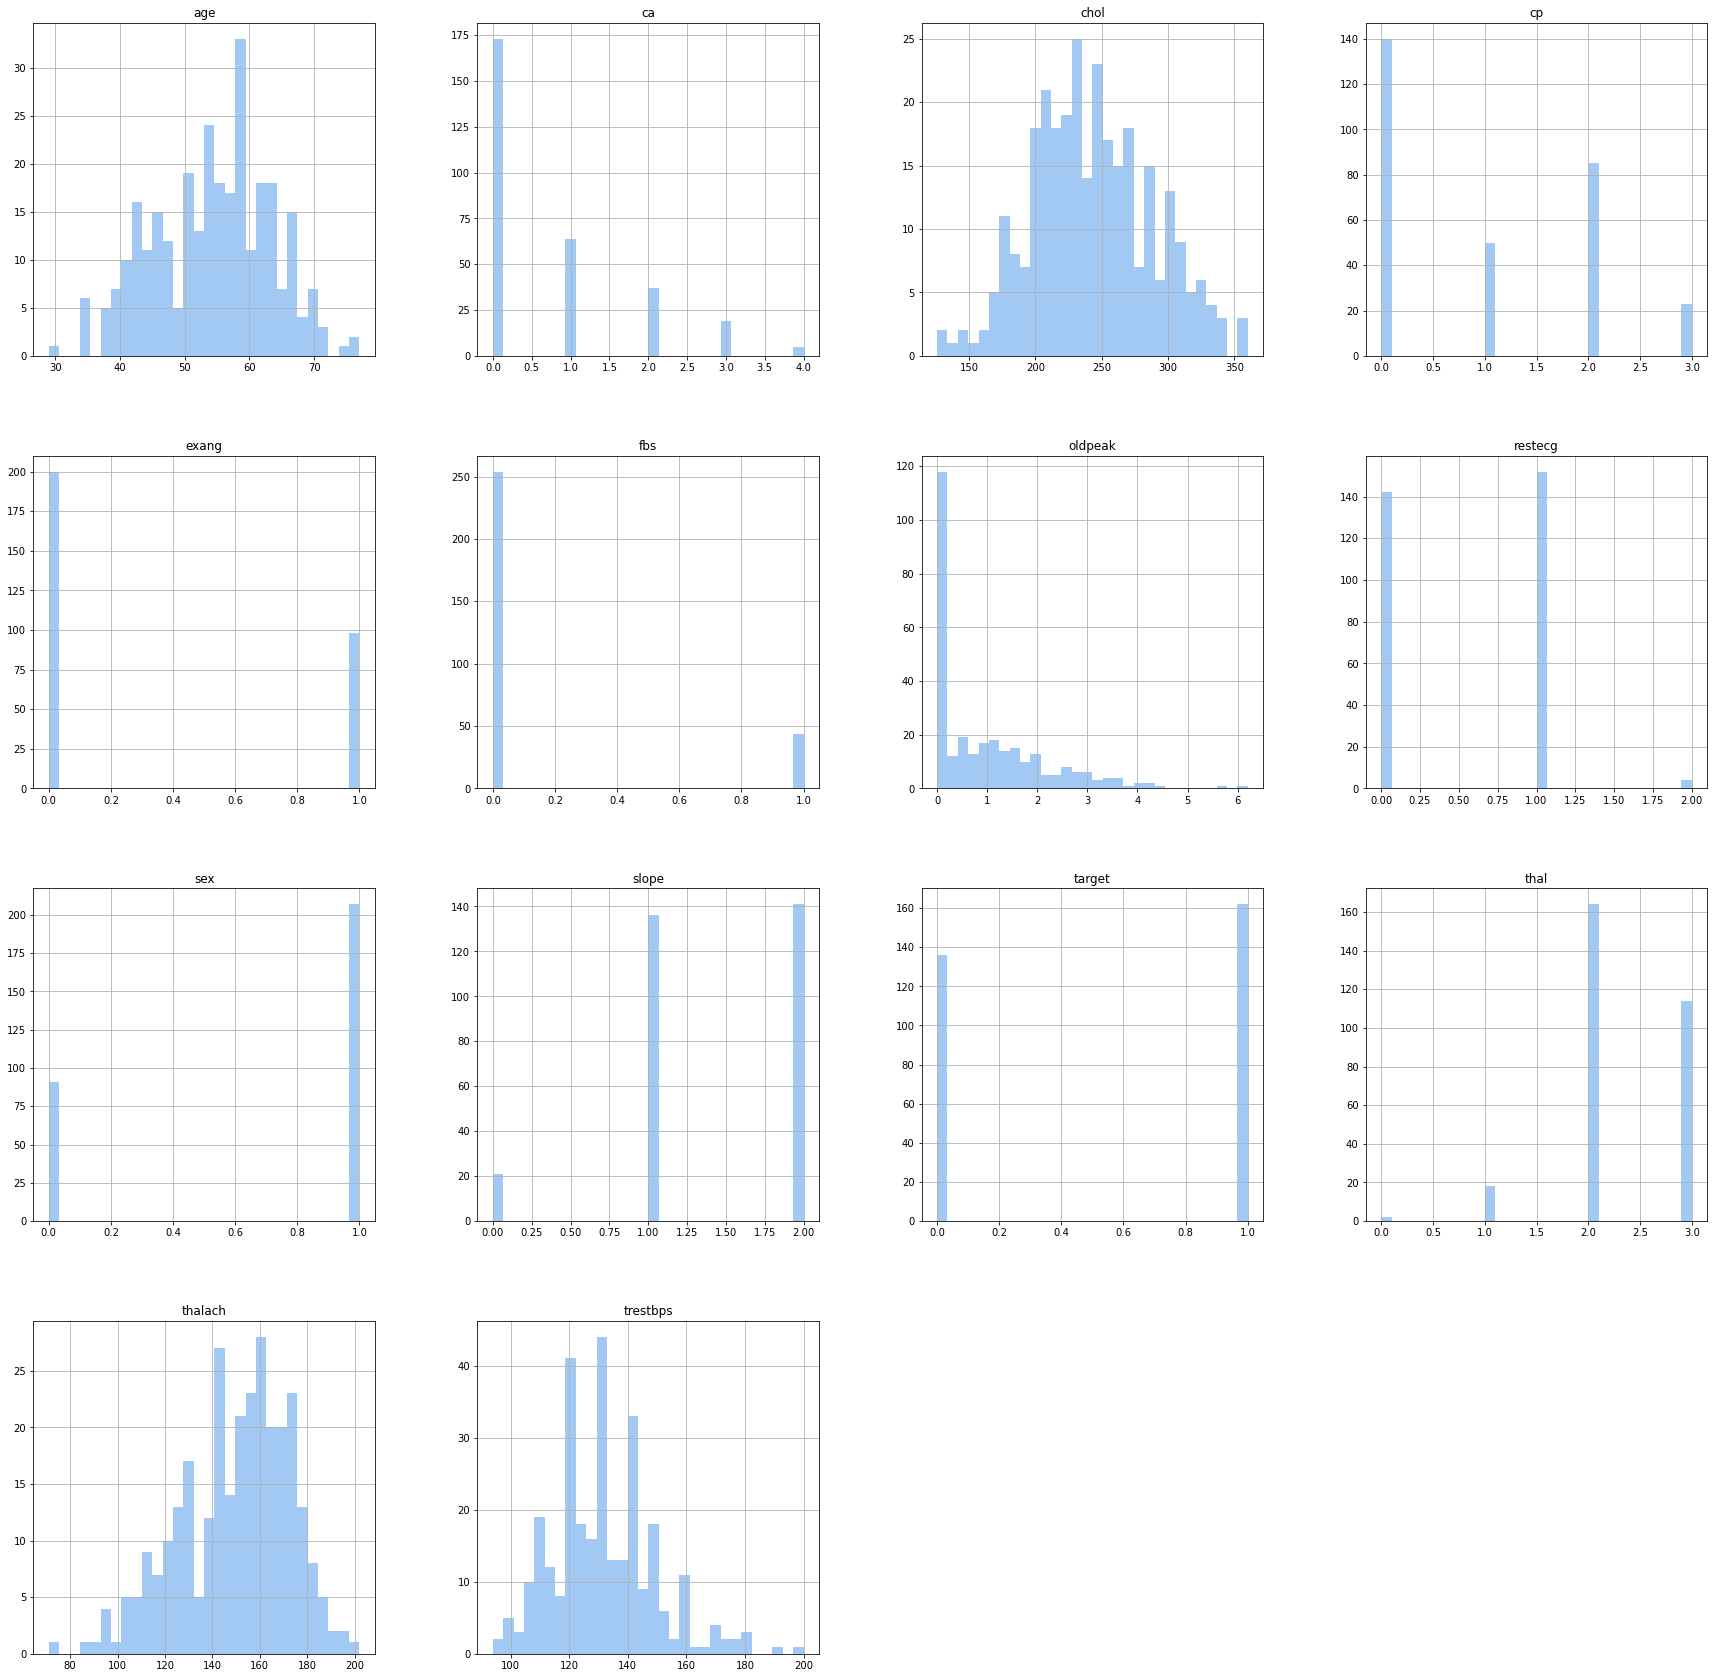

In [9]:
data.hist(bins=30, figsize=(30,30))

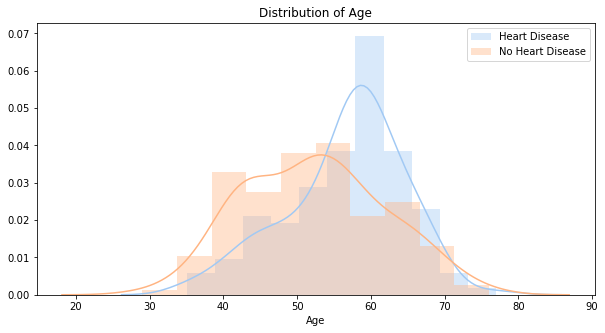

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(data.age[data.target==0])
sns.distplot(data.age[data.target==1])
plt.legend(labels=['Heart Disease','No Heart Disease'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

([<matplotlib.axis.XTick at 0x7f2571027a50>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

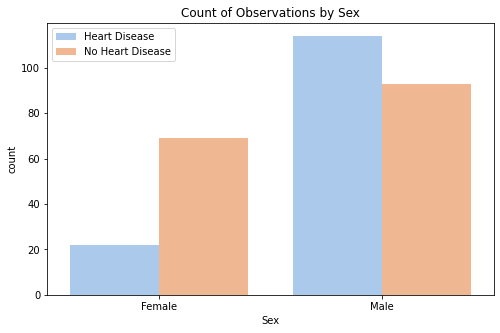

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data.sex, hue=data.target)
plt.legend(labels=['Heart Disease','No Heart Disease'])
plt.title('Count of Observations by Sex')
plt.xlabel('Sex')
plt.xticks(np.arange(2),('Female','Male'))

In [12]:
sex_total = data.sex.value_counts()
sex_heartdisease = data.sex[data.target==0].value_counts()

percentage_hd_sex = []

for i in range(2):
    perc_hd = sex_heartdisease[i]/sex_total[i]
    percentage_hd_sex.append(perc_hd)

Text(0.5, 0, 'Sex')

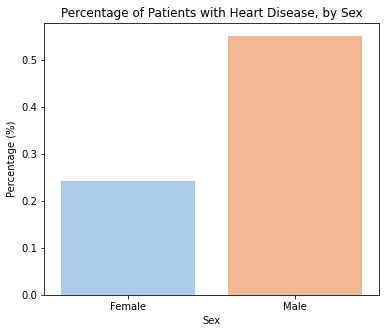

In [13]:
plt.figure(figsize=(6,5))
sns.barplot(y=pd.Series(percentage_hd_sex),x=['Female','Male'])
plt.title('Percentage of Patients with Heart Disease, by Sex')
plt.ylabel('Percentage (%)')
plt.xlabel('Sex')

### Observations on Sex:
1. There are a lot more Male observations than Female observations in this dataset
2. From the dataset, a higher percentage of Males have heart disease in comparison to Females. This may indicate that men have a higher risk of suffering from heart disease.

In [14]:
data.cp.value_counts()

0    140
2     85
1     50
3     23
Name: cp, dtype: int64

Text(0.5, 1.0, 'Chest Pain experienced by Patients')

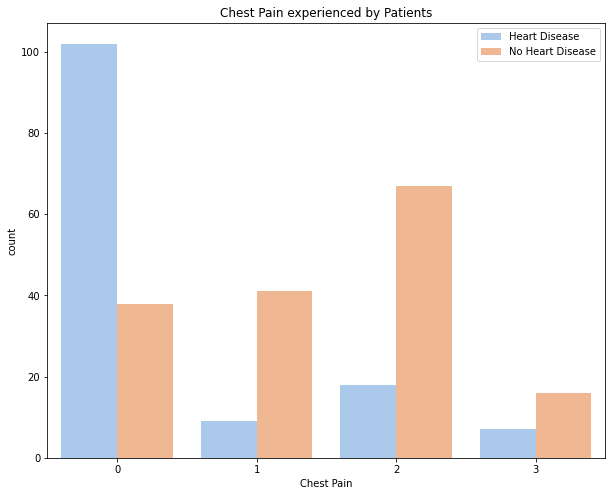

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data.cp, hue=data.target)
plt.legend(labels=['Heart Disease','No Heart Disease'])
plt.xlabel('Chest Pain')
plt.title('Chest Pain experienced by Patients')

### Comment on chestpain:
Patients with heart disease are more likely to experience pain type 0 than any other pain type classification

Text(0.5, 0, 'Blood Pressure')

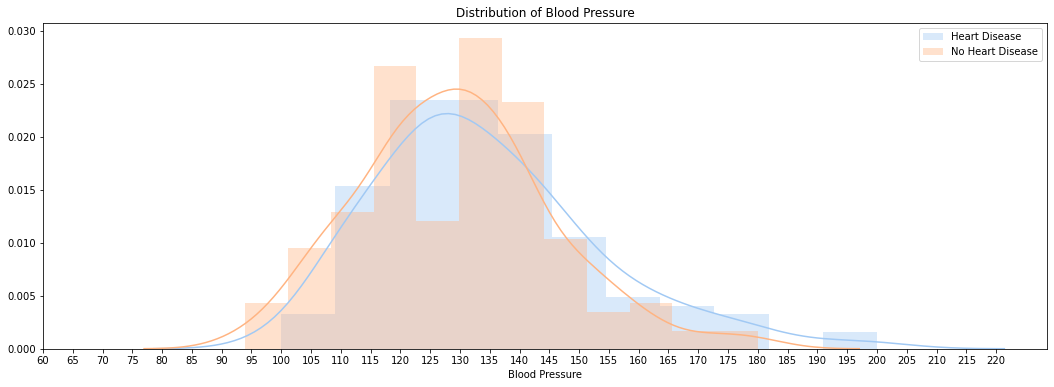

In [16]:
plt.figure(figsize=(18,6))
sns.distplot(data.trestbps[data.target==0])
sns.distplot(data.trestbps[data.target==1])
plt.legend(labels=['Heart Disease','No Heart Disease'])
plt.title('Distribution of Blood Pressure')
plt.xticks(np.arange(60, 221, step=5))
plt.xlabel('Blood Pressure')

In [17]:
print(data.trestbps[data.target==0].mean(), data.trestbps[data.target==1].mean())

134.28676470588235 129.25925925925927


Text(0.5, 0, 'Heart Disease (Y/N)')

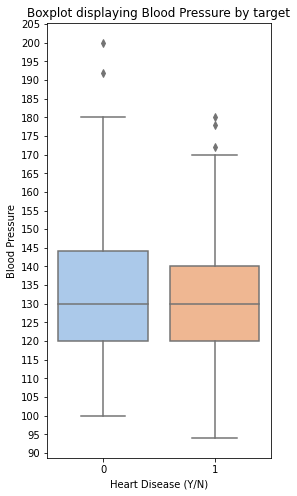

In [18]:
plt.figure(figsize=(4,8))
sns.boxplot(x=data.target, y=data.trestbps)
plt.title('Boxplot displaying Blood Pressure by target')
plt.yticks(np.arange(90, 210, step=5))
plt.ylabel('Blood Pressure')
plt.xlabel('Heart Disease (Y/N)')

### Comment on blood pressure:
1. Patients with heart disease appear to have a higher blood pressure relative to the patients without heart disease in this dataset, as demonstrated in the distribution and boxplots. 
2. That being said, only 25% of those without heart disease had normal blood pressure levels (<120). 
3. Observations of Hypertensive Crisis (>180) were only seen in patients with heart disease.
4. Quartile group 3 for heart disease patients has a larger range than compared to those without heart disease, further reinstating that there is a positive correlation between blood pressure and the risk of heart    disease.

Text(0.5, 0, 'Cholestrol')

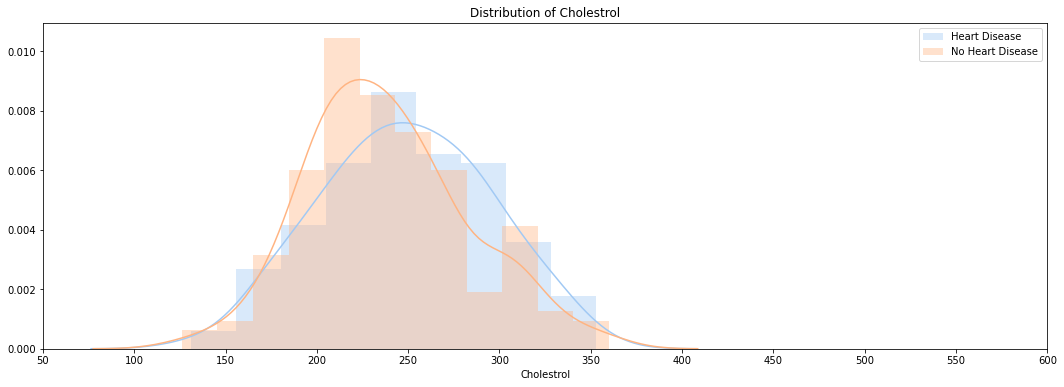

In [19]:
plt.figure(figsize=(18,6))
sns.distplot(data.chol[data.target==0])
sns.distplot(data.chol[data.target==1])
plt.legend(labels=['Heart Disease','No Heart Disease'])
plt.title('Distribution of Cholestrol')
plt.xticks(np.arange(50,650, step=50))
plt.xlabel('Cholestrol')

In [20]:
print('HD Cholestrol Average: ',data.chol[data.target==0].mean(), ', No HD Cholestrol Average: ',data.chol[data.target==1].mean())

HD Cholestrol Average:  248.77941176470588 , No HD Cholestrol Average:  238.2283950617284


In [21]:
data[data.chol>500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### Comment on Cholestrol:
1. There is a clear indication that patients with heart disease are more likely to have higher colestrol levels.
2. That being said, both groups have on average high cholestrol (Healthy levels of cholestrol is <200, High cholestrol is >240)
3. Healthy group is more skewed to the right, high average more likely influenced by outlier of 550: could potentially be an error or incredibly unique case

In [22]:
#dropping the 564 chol case:
x = data[data.chol>500].index
data.drop(x, axis=0, inplace=True)
data.index = range(len(data))

Text(0.5, 0, 'Cholestrol')

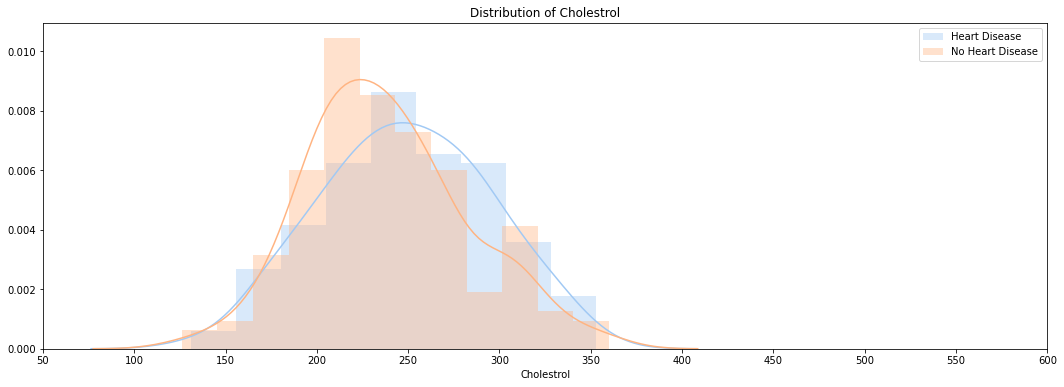

In [23]:
plt.figure(figsize=(18,6))
sns.distplot(data.chol[data.target==0])
sns.distplot(data.chol[data.target==1])
plt.legend(labels=['Heart Disease','No Heart Disease'])
plt.title('Distribution of Cholestrol')
plt.xticks(np.arange(50,650, step=50))
plt.xlabel('Cholestrol')

In [24]:
print('HD Cholestrol Average: ',data.chol[data.target==0].mean(), ', No HD Cholestrol Average: ',data.chol[data.target==1].mean())

HD Cholestrol Average:  248.77941176470588 , No HD Cholestrol Average:  238.2283950617284


In [25]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


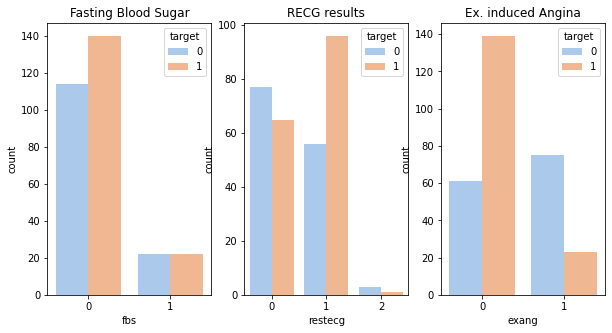

In [26]:
fig = plt.figure(figsize=(10,5))

fig.add_subplot(131)
plt.title('Fasting Blood Sugar')
sns.countplot(data.fbs, hue=data.target)

fig.add_subplot(132)
plt.title('RECG results')
sns.countplot(data.restecg, hue=data.target)

fig.add_subplot(133)
plt.title('Ex. induced Angina')
sns.countplot(data.exang, hue=data.target)

### Comment on Fasting Blood Sugar >120mg/dl, RECG, Angina:
1. No clear correlation between heart disease and fasting blood sugar > 120mg/dl
2. No clear correlation between RECG results and heart disease
3. Those with heart disease more likely to experience exercise induced angina

Text(0.5, 0, 'Max Heart Rate')

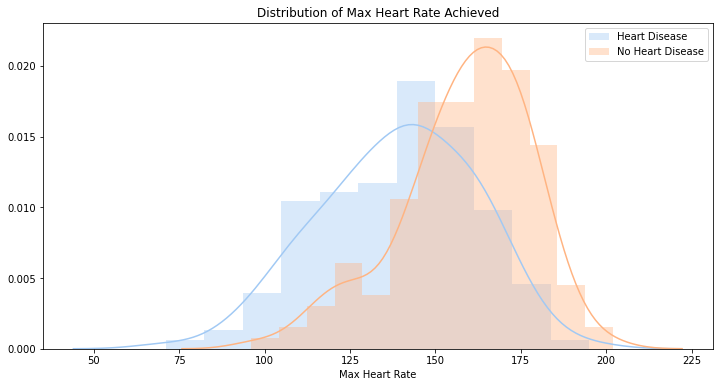

In [27]:
plt.figure(figsize=(12,6))
sns.distplot(data.thalach[data.target==0])
sns.distplot(data.thalach[data.target==1])
plt.legend(labels=['Heart Disease','No Heart Disease'])
plt.title('Distribution of Max Heart Rate Achieved')
plt.xlabel('Max Heart Rate')

### Comments on Max Heart Disease:
Patients with heart disease on average have a much lower achievable max heart rate.

## Step Four: Feature Selection

For feature selection, we will select a significance level of 0.05. All p_values greater than 0.05 indicate that the Null Hypothesis cannot be rejected, and thus there feature is independent from the target.

In [28]:
X = data.drop('target',axis=1)
y = data.target

from sklearn.feature_selection import chi2
F, p_values = chi2(X,y)

In [29]:
p_values = pd.Series(p_values, index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

## Step Five: Training & Model Selections

In [30]:
features = p_values[p_values < 0.05].index

In [31]:
features

Index(['thal', 'sex', 'slope', 'trestbps', 'age', 'chol', 'exang', 'cp', 'ca',
       'oldpeak', 'thalach'],
      dtype='object')

In [32]:
X = data[features]
y = data.target

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The problem statement requires a classification model. The following classification algorithms will be tested:
1. Random Forest Trees
2. Logisitc Regression
3. Naive Bayes Regression

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

RF = RandomForestClassifier()
lr = LogisticRegression()
NB = MultinomialNB()
models = [RF,lr,NB]

In [36]:
def model_test(model, X_train, X_test, y_train, y_test):
    print(model)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(classification_report(y_test, y_predict))

In [37]:
for model in models:
    model_test(model,X_train,X_test,y_train,y_test)

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.79      0.90      0.84        30

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

LogisticRegression()
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        30
           1       0.76      0.97      0.85        30

    accuracy                           0.83        60
   macro avg       0.86      0.83      0.83        60
weighted avg       0.86      0.83      0.83        60

MultinomialNB()
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.73      0.90      0.81        30

    accuracy                           0.78        60
   macro avg       0.80      0.78      0.78        60
weighted avg

From the above results, Logistic Regression will be selected as the classification algorithm for this model. This model produced the best F1-Score results.

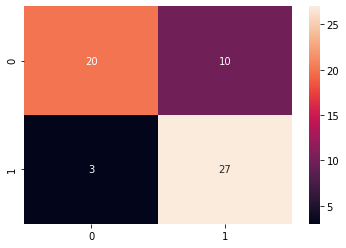

In [38]:
lr.fit(X_train, y_train)
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True)

### Step Six: The Final Model
Since the model has been train and tested, the model will be set with the entire dataset as opposed to the training and testing split

In [39]:
lr.fit(X,y)

LogisticRegression()